# Further Ideas: GAN that generates images similar to flower dataset

...

| Teammember |                    |
|------------|--------------------|
| 1.         | Nadine Weber       |
| 2.         | Patrick Singer     |


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import random
from datetime import datetime
import os
import time
from PIL import Image

%matplotlib inline

print(f"Tensorflow version: {tf.__version__} | Keras version: {keras.__version__}")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-04-06 00:37:31.280229: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Tensorflow version: 2.4.1 | Keras version: 2.4.0
Num GPUs Available:  1


2023-04-06 00:37:33.321756: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-06 00:37:33.322794: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-04-06 00:37:33.356429: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 510.07GiB/s
2023-04-06 00:37:33.356458: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-04-06 00:37:33.358434: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-04-06 00:37:33.358468: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2023-

Original dataset: max val = 255 | min val = 0
Normalized dataset: max val = 1.0 | min val = 0.0


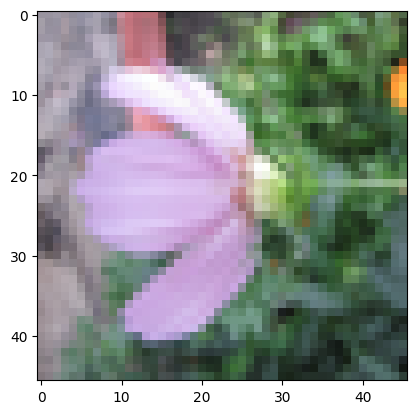

In [2]:
# Load Flower Dataset
img_dir = "./datasets/flowers"
train_x = np.empty((len(os.listdir(img_dir)), 46, 46, 3), dtype=np.uint8)

for i, img_file in enumerate(os.listdir(img_dir)):
    img_path = os.path.join(img_dir, img_file)
    img = Image.open(img_path).convert("RGB").resize((46, 46))
    train_x[i] = np.array(img)

plt.imshow(train_x[0])
    
# Normalize dataset
train_x_norm = train_x/255
print(f"Original dataset: max val = {np.max(train_x)} | min val = {np.min(train_x)}")
print(f"Normalized dataset: max val = {np.max(train_x_norm)} | min val = {np.min(train_x_norm)}")

# Show one example image
plt.imshow(train_x[random.randint(0,len(train_x))]);

In [3]:
# Reshaping dataset (Conv2D wants input = (batch_size, height, width, channels))
x_train_reshaped = tf.convert_to_tensor(train_x_norm)
print(f"Dataset shape: {x_train_reshaped.shape}")

Dataset shape: (813, 46, 46, 3)


2023-04-06 00:37:34.737922: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 00:37:34.738115: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-04-06 00:37:34.739063: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 510.07GiB/s
2023-04-06 00:37:34.739090: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-04-06 00:37:34.739112: I tensorflow/stream_executor/platform/default/ds

In [4]:
def build_discriminator():
    model = keras.Sequential([
        keras.layers.Conv2D(input_shape=(46, 46, 3), filters=32, kernel_size=5, padding="same", activation=keras.layers.LeakyReLU(alpha=0.2)),
        keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
        keras.layers.Conv2D(filters=64, kernel_size=5, padding="same", activation=keras.layers.LeakyReLU(alpha=0.2)),
        keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=1024, activation=keras.layers.LeakyReLU(alpha=0.2)),
        keras.layers.Dense(units=1, activation="sigmoid")
    ])
    
    return model

In [5]:
test_discriminator_model = build_discriminator()
test_discriminator_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        2432      
_________________________________________________________________
average_pooling2d (AveragePo (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        51264     
_________________________________________________________________
average_pooling2d_1 (Average (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              7930880   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

**Testing model with sample image**

In [6]:
print(test_discriminator_model.predict(x_train_reshaped[0:1]))

2023-04-06 00:37:35.553101: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-04-06 00:37:35.553593: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3198120000 Hz
2023-04-06 00:37:35.623555: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-04-06 00:37:35.791756: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-04-06 00:37:36.467012: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-04-06 00:37:36.505863: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


[[0.50474536]]


In [7]:
from tensorflow.keras.layers import Layer

class CustomUpsample(Layer):
    def __init__(self, size=(2, 2), **kwargs):
        super().__init__(**kwargs)
        self.size = size
    
    def call(self, inputs):
        return tf.image.resize(inputs, size=self.size, method=tf.image.ResizeMethod.BILINEAR)

In [8]:
def build_generator(n, output_dim=46):
    l = ((output_dim*2)**2)*3
    
    model = keras.Sequential([
        keras.layers.Dense(input_shape=(n,), units=l, activation="relu"),
        keras.layers.Reshape((output_dim*2, output_dim*2, 3), input_shape=(l,)),
        keras.layers.Conv2D(filters=int(n/2), kernel_size=3, strides=(2, 2), padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.ReLU(),
        CustomUpsample((output_dim*2+2, output_dim*2+2)),
        keras.layers.Conv2D(filters=int(n/4), kernel_size=3, strides=(2, 2)),
        keras.layers.BatchNormalization(),
        keras.layers.ReLU(),
        CustomUpsample((output_dim*2+2, output_dim*2+2)),
        keras.layers.Conv2D(filters=int(n/8), kernel_size=3, strides=(2, 2)),
        keras.layers.BatchNormalization(),
        keras.layers.ReLU(),
        CustomUpsample((output_dim*2+2, output_dim*2+2)),
        keras.layers.Conv2D(filters=3, kernel_size=3, strides=(2, 2), activation="sigmoid")      
    ])
    
    return model

In [9]:
test_generator_model = build_generator(100, output_dim=46)
test_generator_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 25392)             2564592   
_________________________________________________________________
reshape (Reshape)            (None, 92, 92, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 50)        1400      
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 50)        200       
_________________________________________________________________
re_lu (ReLU)                 (None, 46, 46, 50)        0         
_________________________________________________________________
custom_upsample (CustomUpsam (None, 94, 94, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 25)       

**Testing model with sample noise**

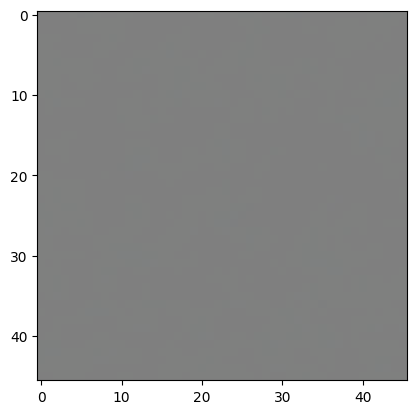

In [10]:
test_out = test_generator_model.predict(([random.random() for _ in range(100)],))
plt.imshow((test_out*255).astype('uint8').squeeze());

In [11]:
@tf.function
def binary_cross_entropy(y_true, y_pred, from_logits=True):
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=from_logits)
    loss = bce(y_true, y_pred)
    return loss

@tf.function
def calc_discriminator_loss(real_output, fake_output):
    real_output_loss = binary_cross_entropy(tf.ones_like(real_output), real_output, from_logits=False)
    fake_output_loss = binary_cross_entropy(tf.zeros_like(fake_output), fake_output, from_logits=False)
    
    total_loss = real_output_loss + fake_output_loss
    return tf.reduce_mean(total_loss)

@tf.function
def calc_generator_loss(fake_output):
    g_loss = binary_cross_entropy(tf.ones_like(fake_output), fake_output)
    return g_loss

In [12]:
def create_log_folder():
    current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
    log_dir = os.path.join("./tensorboard/flowers", current_time)

    if not os.path.exists(log_dir):
        os.makedirs(log_dir)

    file_writer = tf.summary.create_file_writer(log_dir)
    
    return file_writer, log_dir

In [13]:
# Show images of a batch
def show_imgs_of_batch(image_batch):
    fig = plt.figure()

    for i in range(len(image_batch)):
        fig.add_subplot(1, len(image_batch), i+1)
        plt.imshow(image_batch[i], cmap="gray")
        plt.axis('off')
    plt.show()

In [14]:
def pretrain_step(image_batch, generator_model, discriminator_model, discriminator_optimizer, noise_vector_length=100, show_details=False):
    image_batch = tf.convert_to_tensor(image_batch)   
    
    if show_details:
        show_imgs_of_batch(image_batch)
    
    # Generate fake images
    noise = tf.random.normal([len(image_batch), noise_vector_length])
    fake_img_batch = generator_model(noise, training=False)
    
    if show_details:
        show_imgs_of_batch(fake_img_batch)
    
    # Loss
    with tf.GradientTape(persistent=True) as tape:
        real_img_predictions = discriminator_model(image_batch, training=True)   
        fake_img_predictions = discriminator_model(fake_img_batch, training=True)
        
        if show_details:
            print(f"Real predictions:\n{real_img_predictions}\n"
                  f"Fake predictions:\n{fake_img_predictions}")
        
        loss = calc_discriminator_loss(real_img_predictions, fake_img_predictions)
        
        if show_details:
            print(f"Loss: {loss}")

    # Get gradients
    gradients = tape.gradient(loss, discriminator_model.trainable_variables)
    
    # Apply gradients to weights in model
    discriminator_optimizer.apply_gradients(zip(gradients, discriminator_model.trainable_variables))

    return {"loss": loss.numpy(), 
            "real_img_confidence": tf.reduce_mean(real_img_predictions).numpy(),
            "fake_img_confidence": tf.reduce_mean(fake_img_predictions).numpy()}

In [15]:
def pretraining(batch_size, steps, generator_model, discriminator_model, discriminator_optimizer, train_data=x_train_reshaped):
    step_results = []
    fig = plt.figure(dpi=80)
    batches = [train_data[x:x+batch_size] for x in range(0, len(train_data),batch_size)]
    if len(batches) > steps:
        batches = batches[:steps]
    
    for batch_imgs in batches:
        step_result = pretrain_step(batch_imgs, generator_model, discriminator_model, discriminator_optimizer, show_details=False)
        step_results.append(step_result)
    
    # Plot
    fig.add_subplot(2, 1, 1)
    
    plt.plot([val["loss"] for val in step_results], "b")
    plt.title("Discriminator Pretraining")
    plt.ylabel("Loss")
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    
    fig.add_subplot(2, 1, 2)
    plt.plot([val["real_img_confidence"] for val in step_results], "g", label="Real Images")
    plt.plot([val["fake_img_confidence"] for val in step_results], "r", label="Fake Images")
    plt.xlabel("Step")
    plt.ylabel("Confidence") 
    plt.legend()
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    
    plt.show()

In [16]:
def train_step(image_batch, generator_model, discriminator_model, discriminator_optimizer, generator_optimizer, noise_vector_length=100, show_details=False):
    image_batch = tf.convert_to_tensor(image_batch)   
    
    # Loss
    with tf.GradientTape(persistent=True) as tape:
        # Generate fake images
        noise = tf.random.normal([len(image_batch), noise_vector_length])
        fake_img_batch = generator_model(noise, training=False)
        
        # Discriminator prediction for real and fakes
        real_img_predictions = discriminator_model(image_batch, training=True)   
        fake_img_predictions = discriminator_model(fake_img_batch, training=True)
        
        # Losses for both models
        dis_loss = calc_discriminator_loss(real_img_predictions, fake_img_predictions)
        gen_loss = calc_generator_loss(fake_img_predictions)
        
        if show_details:
            print(f"Discriminator Loss: {dis_loss}")
            print(f"Generator Loss: {gen_loss}")
            print(len(fake_img_batch))
            show_imgs_of_batch(fake_img_batch[0:5])
        
    # Get gradients
    dis_gradients = tape.gradient(dis_loss, discriminator_model.trainable_variables)
    gen_gradients = tape.gradient(gen_loss, generator_model.trainable_variables)

    # Apply gradients to weights in model
    discriminator_optimizer.apply_gradients(zip(dis_gradients, discriminator_model.trainable_weights))
    generator_optimizer.apply_gradients(zip(gen_gradients, generator_model.trainable_variables))
    
    return {"discriminator_loss": dis_loss.numpy(),
            "generator_loss": gen_loss.numpy(),
            "sample_images": fake_img_batch[:4]}

In [17]:
def training(batch_size, epochs, generator_model, discriminator_model, discriminator_optimizer, generator_optimizer, train_data=x_train_reshaped, plot_every_x_epochs=10, file_writer=None):
    step_results_list = []
    total_trained_on_images = 0
    total_weight_adjustments = 0
    start_time = time.time()
    
    for epoch in range(1, epochs+1):
        
        # Shuffle new batches
        tf.random.shuffle(train_data)
        batches = [train_data[x:x+batch_size] for x in range(0, len(train_data),batch_size)]
        if len(batches[-1]) != batch_size:
            batches = batches[:-1]
        
        # Train one epoch 
        for batch_imgs in batches:
            step_results = train_step(batch_imgs, generator_model, discriminator_model, discriminator_optimizer, generator_optimizer)
            step_results_list.append({"discriminator_loss": step_results["discriminator_loss"], "generator_loss": step_results["generator_loss"]})
            
            total_trained_on_images += len(batch_imgs)
            total_weight_adjustments += 1
            
            # Write to file every 10 steps as described in the task
            if total_weight_adjustments % 10 == 0 and file_writer != None:
                with file_writer.as_default():
                    tf.summary.scalar("generator_loss", step_results['generator_loss'], step=total_weight_adjustments)
                    tf.summary.scalar("discriminator_loss", step_results['discriminator_loss'], step=total_weight_adjustments)
                    for i in range(1, len(step_results["sample_images"])):
                        tf.summary.image(f"sample_img_{i}", step_results["sample_images"][i-1:i], step=total_weight_adjustments)
                

        # Summary
        if epoch % plot_every_x_epochs == 0 or epoch == 1:
                        
            # Print summary
            print(f"Summary after epoch {epoch}\n" +"="*(20+len(str(epoch))))
            print(f"Training progress: {round((epoch/epochs)*100)}%")
            print(f"Time elapsed: {round(time.time() - start_time)} seconds")
            print(f"Current Discriminator Loss: {str(step_results['discriminator_loss'])[:5]}")
            print(f"Current Generator Loss: {str(step_results['generator_loss'])[:5]}")
            print(f"Total trained on images: {total_trained_on_images}")
            print(f"Total weight adjustments: {total_weight_adjustments}")
            
            # Plot summary
            fig = plt.figure(figsize=(8, 3), dpi=80)
            gs = fig.add_gridspec(2,5)
            
            ax1 = fig.add_subplot(gs[:, 0:3])
            ax1.plot([val["discriminator_loss"] for val in step_results_list], "r", label="Discriminator")
            ax1.plot([val["generator_loss"] for val in step_results_list], "g", label="Generator")
            ax1.set_title(f"Training after epoch {epoch}")
            ax1.set_xlabel("Step")
            ax1.set_ylabel("Loss")
            ax1.legend()
            
            ax2 = fig.add_subplot(gs[0, 3])
            ax2.imshow(step_results["sample_images"][0], cmap="gray")
            ax2.axis('off')
            ax3 = fig.add_subplot(gs[1, 3])          
            ax3.imshow(step_results["sample_images"][1], cmap="gray")
            ax3.axis('off')
            ax4 = fig.add_subplot(gs[0, 4])
            ax4.imshow(step_results["sample_images"][2], cmap="gray")
            ax4.axis('off')
            ax5 = fig.add_subplot(gs[1, 4])          
            ax5.imshow(step_results["sample_images"][3], cmap="gray")
            ax5.axis('off')

            plt.show()

In [18]:
def complete_training(generator_learn_rate, discriminator_learn_rate, batch_size, pretraining_steps, training_epochs, create_new_models=True, open_tensorboard=False):
    
    if create_new_models:
        # New models
        generator_model = build_generator(100)
        discriminator_model = build_discriminator()
        # Optimizers
        generator_optimizer = tf.keras.optimizers.Adam(generator_learn_rate)
        discriminator_optimizer = tf.keras.optimizers.Adam(discriminator_learn_rate)
        # Compile models
        discriminator_model.compile(loss=calc_discriminator_loss, optimizer=discriminator_optimizer)
        generator_model.compile(loss=calc_generator_loss, optimizer=generator_optimizer)
        print(">> Created new Models")
        
    # Create log folder
    file_writer, log_dir = create_log_folder()
    
    # Training
    if pretraining_steps > 0:
        print(">> Beginning Pretraining")
        pretrain_start_time = time.time()
        pretraining(batch_size, pretraining_steps, generator_model, discriminator_model, discriminator_optimizer, train_data=x_train_reshaped)
        print(f">> Finished Pretraining after {round(time.time() - pretrain_start_time)} seconds")
    else:
        print(">> Skipping Pretraining")
    
    print(">> Beginning Training\n")
    train_start_time = time.time()
    training(batch_size, training_epochs, generator_model, discriminator_model, discriminator_optimizer, generator_optimizer, plot_every_x_epochs=100, file_writer=file_writer)
    print(f">> Finished Training after {round(time.time() - train_start_time)} seconds")
    
    if open_tensorboard:
        print(f">> Opening Tensorboard")
        !tensorboard --logdir={log_dir}
    
    return generator_model

Summary after epoch 1800
Training progress: 18%
Time elapsed: 1185 seconds
Current Discriminator Loss: 1.389
Current Generator Loss: 0.475
Total trained on images: 1382400
Total weight adjustments: 10800


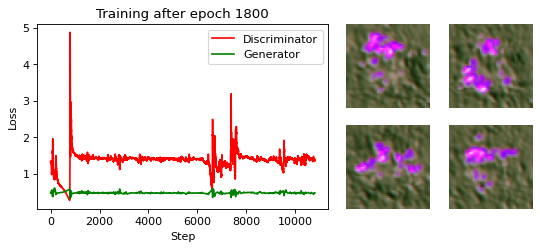

Summary after epoch 1900
Training progress: 19%
Time elapsed: 1250 seconds
Current Discriminator Loss: 1.463
Current Generator Loss: 0.465
Total trained on images: 1459200
Total weight adjustments: 11400


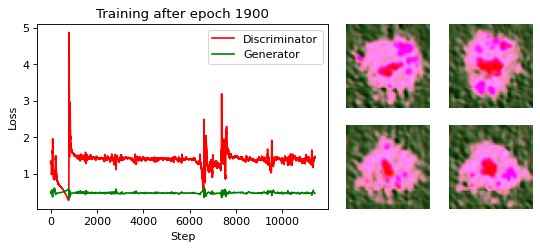

Summary after epoch 2000
Training progress: 20%
Time elapsed: 1316 seconds
Current Discriminator Loss: 1.439
Current Generator Loss: 0.476
Total trained on images: 1536000
Total weight adjustments: 12000


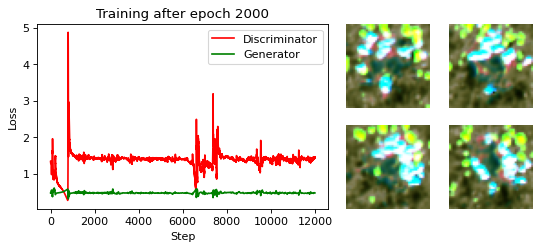

Summary after epoch 2100
Training progress: 21%
Time elapsed: 1381 seconds
Current Discriminator Loss: 1.398
Current Generator Loss: 0.481
Total trained on images: 1612800
Total weight adjustments: 12600


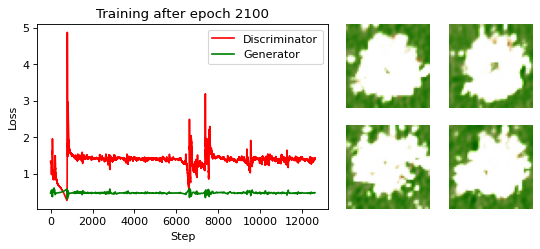

Summary after epoch 2200
Training progress: 22%
Time elapsed: 1447 seconds
Current Discriminator Loss: 0.843
Current Generator Loss: 0.543
Total trained on images: 1689600
Total weight adjustments: 13200


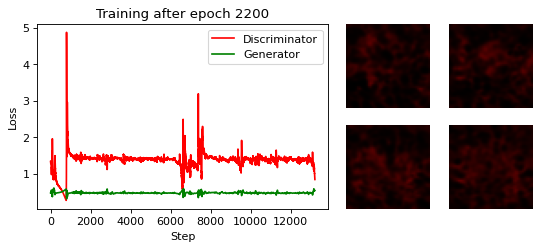

Summary after epoch 2300
Training progress: 23%
Time elapsed: 1512 seconds
Current Discriminator Loss: 1.274
Current Generator Loss: 0.529
Total trained on images: 1766400
Total weight adjustments: 13800


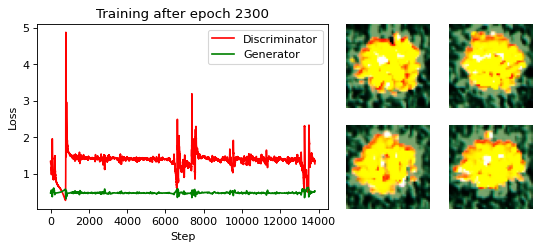

Summary after epoch 2400
Training progress: 24%
Time elapsed: 1578 seconds
Current Discriminator Loss: 1.457
Current Generator Loss: 0.463
Total trained on images: 1843200
Total weight adjustments: 14400


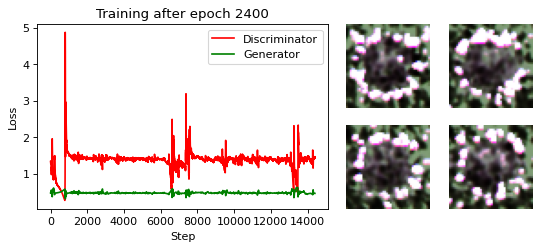

Summary after epoch 2500
Training progress: 25%
Time elapsed: 1643 seconds
Current Discriminator Loss: 1.395
Current Generator Loss: 0.488
Total trained on images: 1920000
Total weight adjustments: 15000


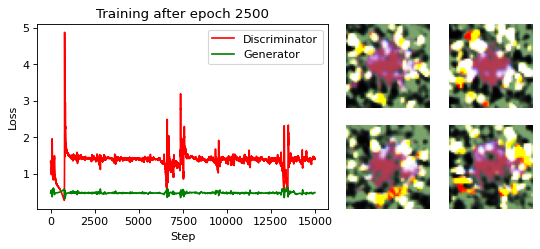

Summary after epoch 2600
Training progress: 26%
Time elapsed: 1709 seconds
Current Discriminator Loss: 1.414
Current Generator Loss: 0.466
Total trained on images: 1996800
Total weight adjustments: 15600


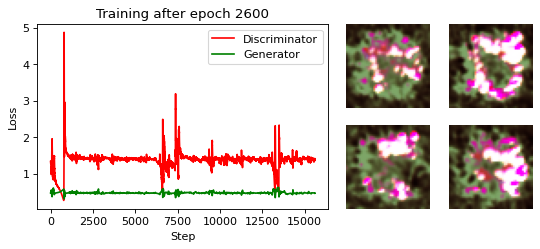

Summary after epoch 2700
Training progress: 27%
Time elapsed: 1774 seconds
Current Discriminator Loss: 1.354
Current Generator Loss: 0.477
Total trained on images: 2073600
Total weight adjustments: 16200


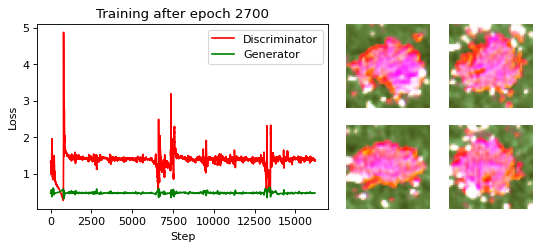

Summary after epoch 2800
Training progress: 28%
Time elapsed: 1839 seconds
Current Discriminator Loss: 1.382
Current Generator Loss: 0.484
Total trained on images: 2150400
Total weight adjustments: 16800


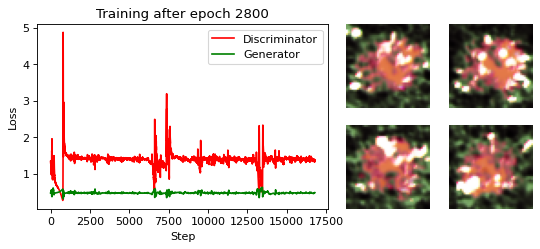

Summary after epoch 2900
Training progress: 29%
Time elapsed: 1905 seconds
Current Discriminator Loss: 1.392
Current Generator Loss: 0.487
Total trained on images: 2227200
Total weight adjustments: 17400


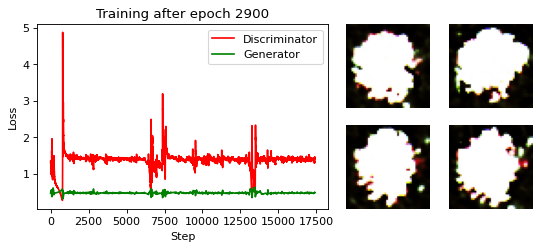

Summary after epoch 3000
Training progress: 30%
Time elapsed: 1970 seconds
Current Discriminator Loss: 1.450
Current Generator Loss: 0.467
Total trained on images: 2304000
Total weight adjustments: 18000


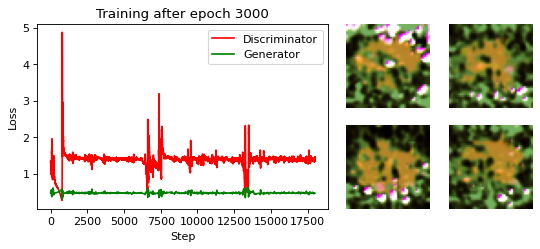

Summary after epoch 3100
Training progress: 31%
Time elapsed: 2036 seconds
Current Discriminator Loss: 1.416
Current Generator Loss: 0.479
Total trained on images: 2380800
Total weight adjustments: 18600


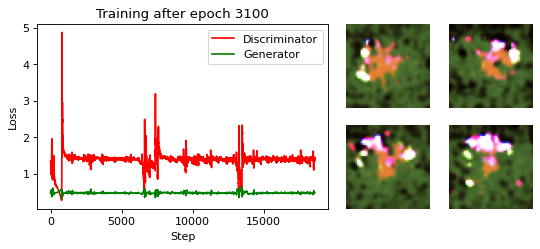

Summary after epoch 3200
Training progress: 32%
Time elapsed: 2102 seconds
Current Discriminator Loss: 1.400
Current Generator Loss: 0.475
Total trained on images: 2457600
Total weight adjustments: 19200


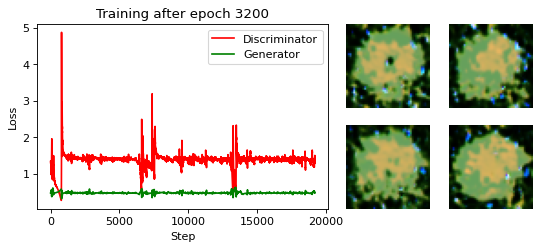

Summary after epoch 3300
Training progress: 33%
Time elapsed: 2167 seconds
Current Discriminator Loss: 1.361
Current Generator Loss: 0.476
Total trained on images: 2534400
Total weight adjustments: 19800


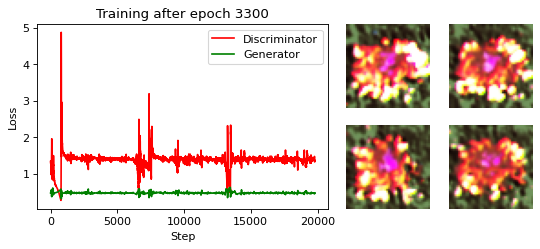

Summary after epoch 3400
Training progress: 34%
Time elapsed: 2233 seconds
Current Discriminator Loss: 1.398
Current Generator Loss: 0.471
Total trained on images: 2611200
Total weight adjustments: 20400


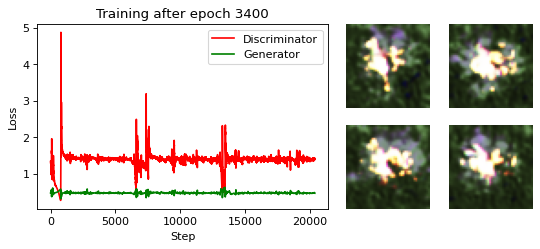

Summary after epoch 3500
Training progress: 35%
Time elapsed: 2298 seconds
Current Discriminator Loss: 1.342
Current Generator Loss: 0.499
Total trained on images: 2688000
Total weight adjustments: 21000


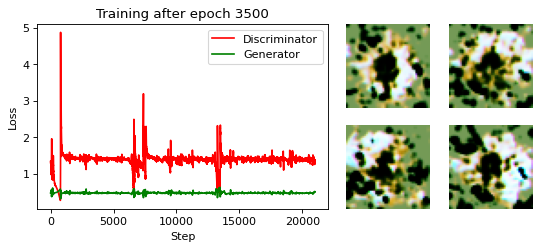

Summary after epoch 3600
Training progress: 36%
Time elapsed: 2364 seconds
Current Discriminator Loss: 1.379
Current Generator Loss: 0.477
Total trained on images: 2764800
Total weight adjustments: 21600


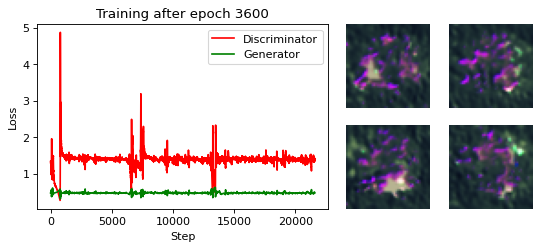

Summary after epoch 3700
Training progress: 37%
Time elapsed: 2429 seconds
Current Discriminator Loss: 1.391
Current Generator Loss: 0.470
Total trained on images: 2841600
Total weight adjustments: 22200


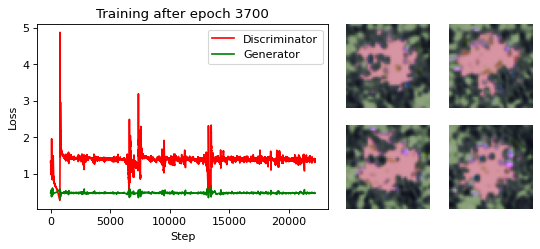

Summary after epoch 3800
Training progress: 38%
Time elapsed: 2495 seconds
Current Discriminator Loss: 1.366
Current Generator Loss: 0.472
Total trained on images: 2918400
Total weight adjustments: 22800


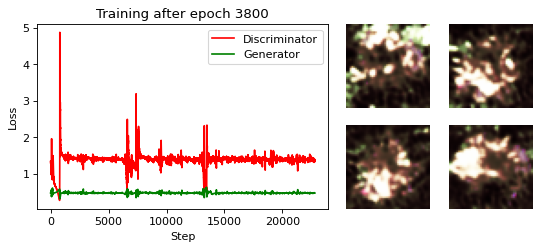

Summary after epoch 3900
Training progress: 39%
Time elapsed: 2560 seconds
Current Discriminator Loss: 1.258
Current Generator Loss: 0.514
Total trained on images: 2995200
Total weight adjustments: 23400


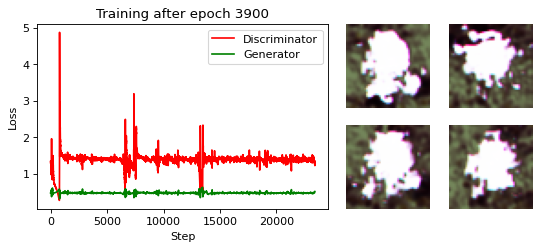

Summary after epoch 4000
Training progress: 40%
Time elapsed: 2626 seconds
Current Discriminator Loss: 1.405
Current Generator Loss: 0.460
Total trained on images: 3072000
Total weight adjustments: 24000


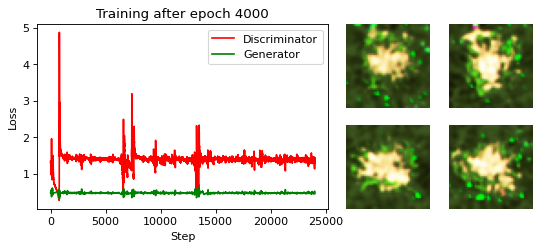

Summary after epoch 4100
Training progress: 41%
Time elapsed: 2691 seconds
Current Discriminator Loss: 1.382
Current Generator Loss: 0.471
Total trained on images: 3148800
Total weight adjustments: 24600


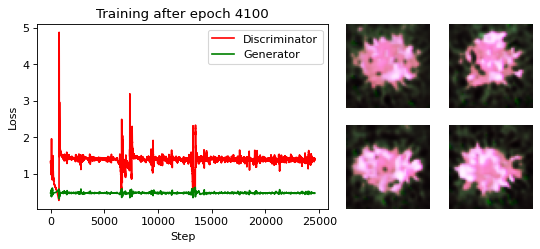

Summary after epoch 4200
Training progress: 42%
Time elapsed: 2757 seconds
Current Discriminator Loss: 1.387
Current Generator Loss: 0.474
Total trained on images: 3225600
Total weight adjustments: 25200


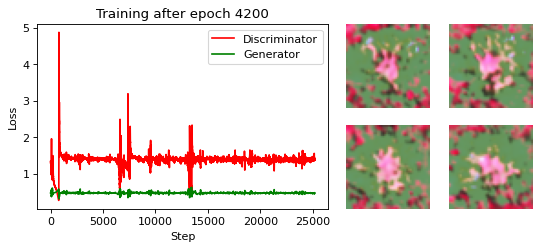

Summary after epoch 4300
Training progress: 43%
Time elapsed: 2822 seconds
Current Discriminator Loss: 1.407
Current Generator Loss: 0.479
Total trained on images: 3302400
Total weight adjustments: 25800


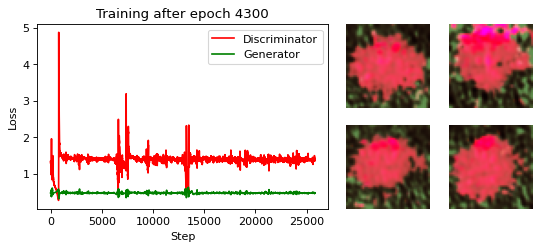

Summary after epoch 4400
Training progress: 44%
Time elapsed: 2888 seconds
Current Discriminator Loss: 1.399
Current Generator Loss: 0.470
Total trained on images: 3379200
Total weight adjustments: 26400


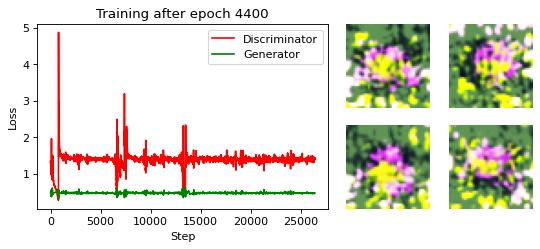

Summary after epoch 4500
Training progress: 45%
Time elapsed: 2953 seconds
Current Discriminator Loss: 1.368
Current Generator Loss: 0.480
Total trained on images: 3456000
Total weight adjustments: 27000


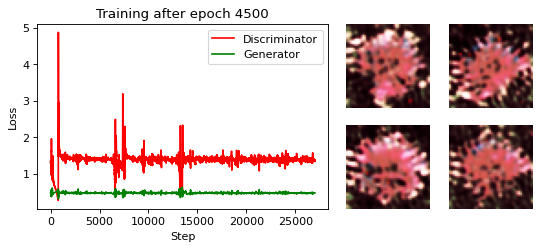

Summary after epoch 4600
Training progress: 46%
Time elapsed: 3019 seconds
Current Discriminator Loss: 1.395
Current Generator Loss: 0.474
Total trained on images: 3532800
Total weight adjustments: 27600


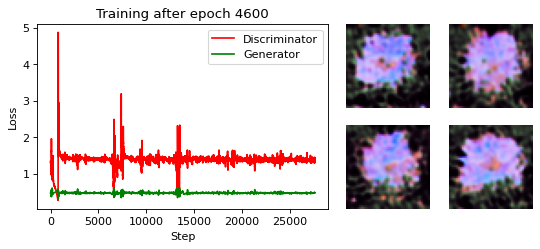

Summary after epoch 4700
Training progress: 47%
Time elapsed: 3084 seconds
Current Discriminator Loss: 1.388
Current Generator Loss: 0.469
Total trained on images: 3609600
Total weight adjustments: 28200


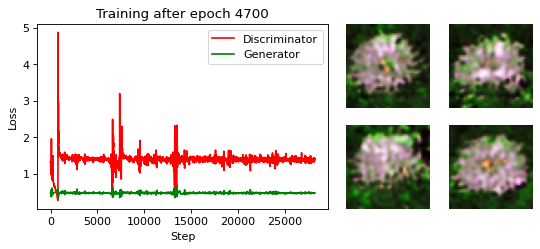

Summary after epoch 4800
Training progress: 48%
Time elapsed: 3150 seconds
Current Discriminator Loss: 1.368
Current Generator Loss: 0.474
Total trained on images: 3686400
Total weight adjustments: 28800


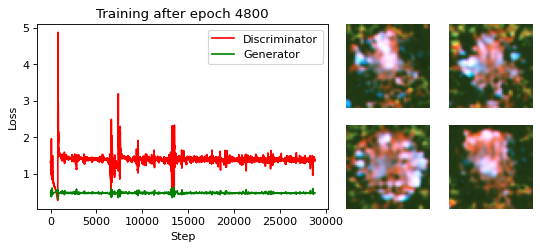

Summary after epoch 4900
Training progress: 49%
Time elapsed: 3215 seconds
Current Discriminator Loss: 1.351
Current Generator Loss: 0.476
Total trained on images: 3763200
Total weight adjustments: 29400


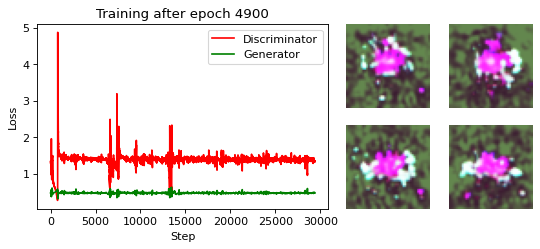

Summary after epoch 5000
Training progress: 50%
Time elapsed: 3281 seconds
Current Discriminator Loss: 1.358
Current Generator Loss: 0.473
Total trained on images: 3840000
Total weight adjustments: 30000


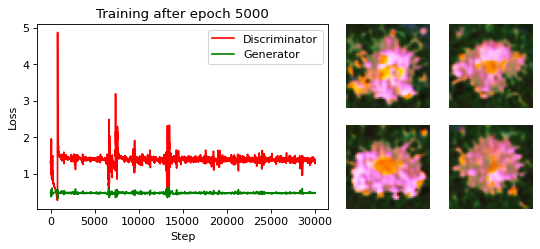

Summary after epoch 5100
Training progress: 51%
Time elapsed: 3346 seconds
Current Discriminator Loss: 1.349
Current Generator Loss: 0.474
Total trained on images: 3916800
Total weight adjustments: 30600


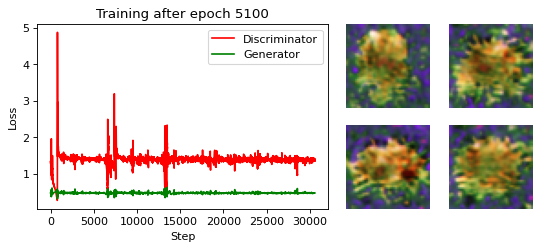

Summary after epoch 5200
Training progress: 52%
Time elapsed: 3412 seconds
Current Discriminator Loss: 1.275
Current Generator Loss: 0.490
Total trained on images: 3993600
Total weight adjustments: 31200


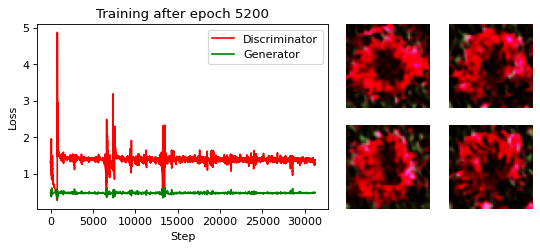

Summary after epoch 5300
Training progress: 53%
Time elapsed: 3477 seconds
Current Discriminator Loss: 1.434
Current Generator Loss: 0.466
Total trained on images: 4070400
Total weight adjustments: 31800


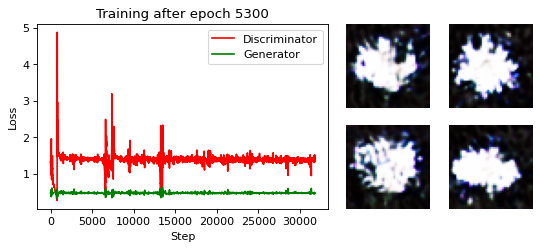

Summary after epoch 5400
Training progress: 54%
Time elapsed: 3543 seconds
Current Discriminator Loss: 1.373
Current Generator Loss: 0.477
Total trained on images: 4147200
Total weight adjustments: 32400


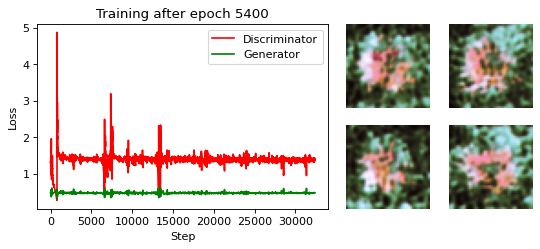

Summary after epoch 5500
Training progress: 55%
Time elapsed: 3609 seconds
Current Discriminator Loss: 1.565
Current Generator Loss: 0.433
Total trained on images: 4224000
Total weight adjustments: 33000


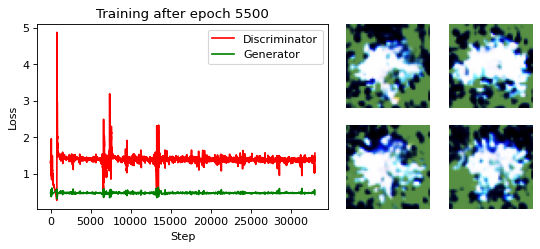

Summary after epoch 5600
Training progress: 56%
Time elapsed: 3674 seconds
Current Discriminator Loss: 1.402
Current Generator Loss: 0.466
Total trained on images: 4300800
Total weight adjustments: 33600


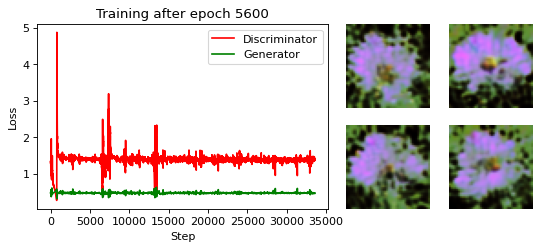

Summary after epoch 5700
Training progress: 57%
Time elapsed: 3740 seconds
Current Discriminator Loss: 1.391
Current Generator Loss: 0.470
Total trained on images: 4377600
Total weight adjustments: 34200


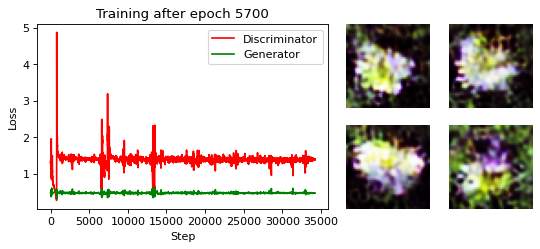

Summary after epoch 5800
Training progress: 58%
Time elapsed: 3805 seconds
Current Discriminator Loss: 1.378
Current Generator Loss: 0.468
Total trained on images: 4454400
Total weight adjustments: 34800


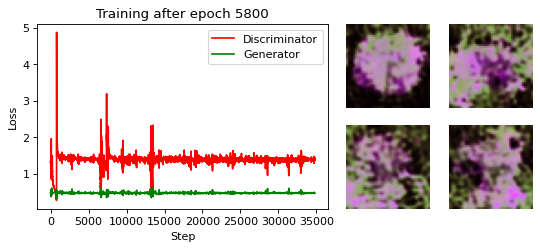

Summary after epoch 5900
Training progress: 59%
Time elapsed: 3871 seconds
Current Discriminator Loss: 1.326
Current Generator Loss: 0.487
Total trained on images: 4531200
Total weight adjustments: 35400


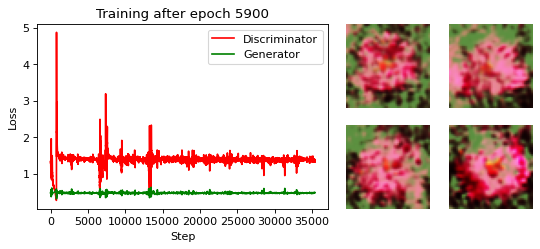

Summary after epoch 6000
Training progress: 60%
Time elapsed: 3937 seconds
Current Discriminator Loss: 1.399
Current Generator Loss: 0.475
Total trained on images: 4608000
Total weight adjustments: 36000


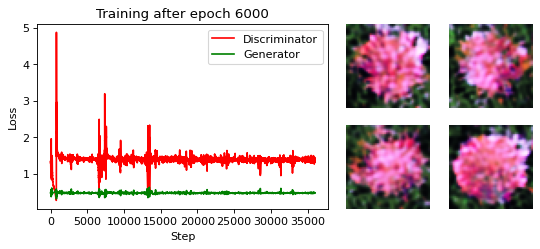

Summary after epoch 6100
Training progress: 61%
Time elapsed: 4002 seconds
Current Discriminator Loss: 1.288
Current Generator Loss: 0.499
Total trained on images: 4684800
Total weight adjustments: 36600


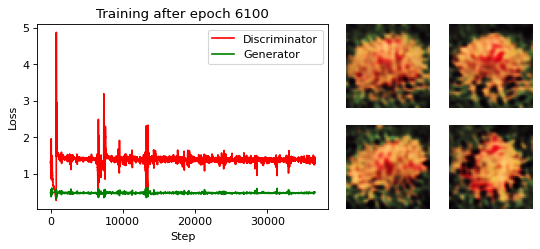

Summary after epoch 6200
Training progress: 62%
Time elapsed: 4068 seconds
Current Discriminator Loss: 1.338
Current Generator Loss: 0.477
Total trained on images: 4761600
Total weight adjustments: 37200


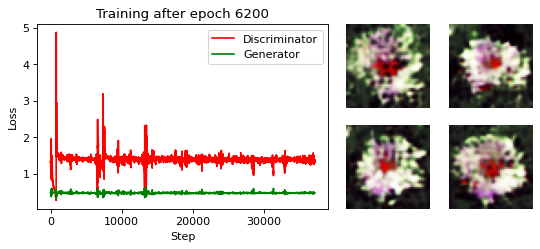

Summary after epoch 6300
Training progress: 63%
Time elapsed: 4133 seconds
Current Discriminator Loss: 1.432
Current Generator Loss: 0.469
Total trained on images: 4838400
Total weight adjustments: 37800


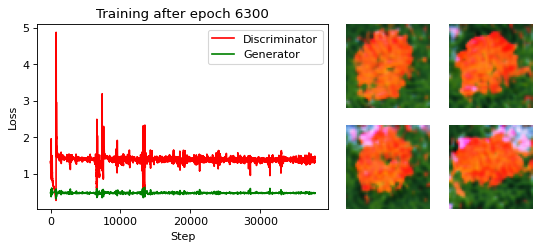

Summary after epoch 6400
Training progress: 64%
Time elapsed: 4199 seconds
Current Discriminator Loss: 1.396
Current Generator Loss: 0.467
Total trained on images: 4915200
Total weight adjustments: 38400


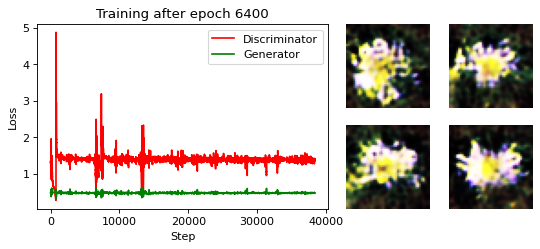

Summary after epoch 6500
Training progress: 65%
Time elapsed: 4264 seconds
Current Discriminator Loss: 1.376
Current Generator Loss: 0.481
Total trained on images: 4992000
Total weight adjustments: 39000


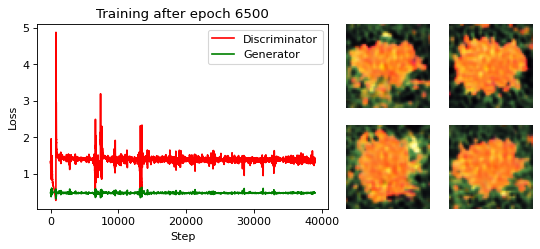

Summary after epoch 6600
Training progress: 66%
Time elapsed: 4330 seconds
Current Discriminator Loss: 1.376
Current Generator Loss: 0.468
Total trained on images: 5068800
Total weight adjustments: 39600


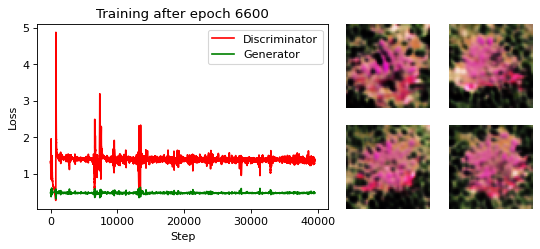

Summary after epoch 6700
Training progress: 67%
Time elapsed: 4396 seconds
Current Discriminator Loss: 1.333
Current Generator Loss: 0.483
Total trained on images: 5145600
Total weight adjustments: 40200


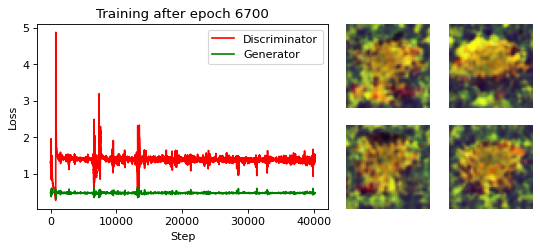

Summary after epoch 6800
Training progress: 68%
Time elapsed: 4461 seconds
Current Discriminator Loss: 1.340
Current Generator Loss: 0.482
Total trained on images: 5222400
Total weight adjustments: 40800


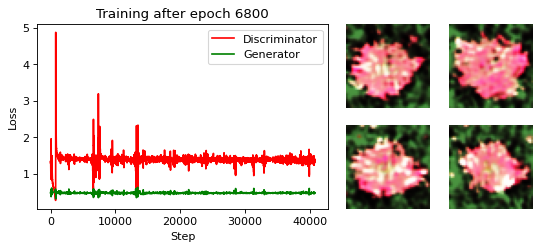

Summary after epoch 6900
Training progress: 69%
Time elapsed: 4527 seconds
Current Discriminator Loss: 1.331
Current Generator Loss: 0.486
Total trained on images: 5299200
Total weight adjustments: 41400


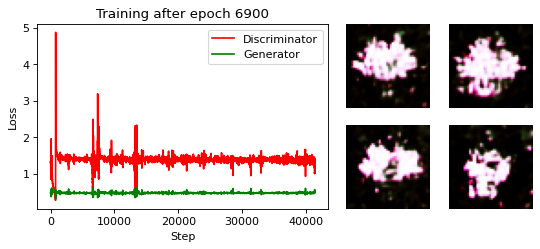

Summary after epoch 7000
Training progress: 70%
Time elapsed: 4593 seconds
Current Discriminator Loss: 1.336
Current Generator Loss: 0.472
Total trained on images: 5376000
Total weight adjustments: 42000


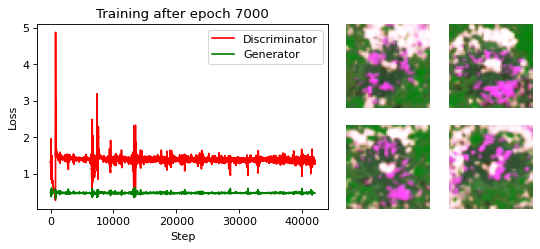

Summary after epoch 7100
Training progress: 71%
Time elapsed: 4658 seconds
Current Discriminator Loss: 1.320
Current Generator Loss: 0.475
Total trained on images: 5452800
Total weight adjustments: 42600


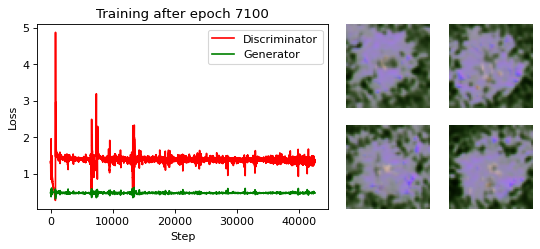

Summary after epoch 7200
Training progress: 72%
Time elapsed: 4724 seconds
Current Discriminator Loss: 1.213
Current Generator Loss: 0.510
Total trained on images: 5529600
Total weight adjustments: 43200


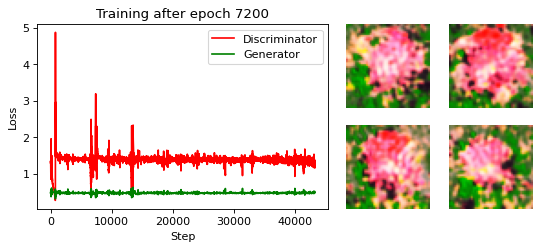

Summary after epoch 7300
Training progress: 73%
Time elapsed: 4789 seconds
Current Discriminator Loss: 1.434
Current Generator Loss: 0.459
Total trained on images: 5606400
Total weight adjustments: 43800


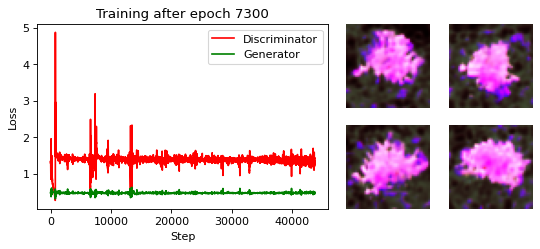

Summary after epoch 7400
Training progress: 74%
Time elapsed: 4855 seconds
Current Discriminator Loss: 1.251
Current Generator Loss: 0.515
Total trained on images: 5683200
Total weight adjustments: 44400


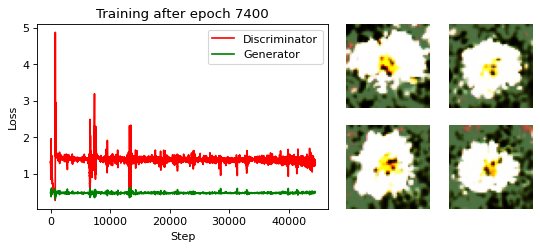

Summary after epoch 7500
Training progress: 75%
Time elapsed: 4920 seconds
Current Discriminator Loss: 1.521
Current Generator Loss: 0.457
Total trained on images: 5760000
Total weight adjustments: 45000


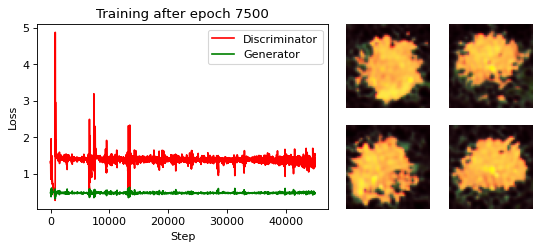

Summary after epoch 7600
Training progress: 76%
Time elapsed: 4986 seconds
Current Discriminator Loss: 1.306
Current Generator Loss: 0.480
Total trained on images: 5836800
Total weight adjustments: 45600


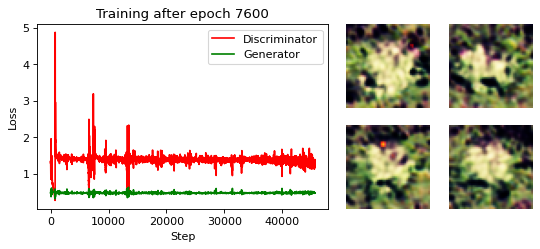

Summary after epoch 7700
Training progress: 77%
Time elapsed: 5051 seconds
Current Discriminator Loss: 1.333
Current Generator Loss: 0.472
Total trained on images: 5913600
Total weight adjustments: 46200


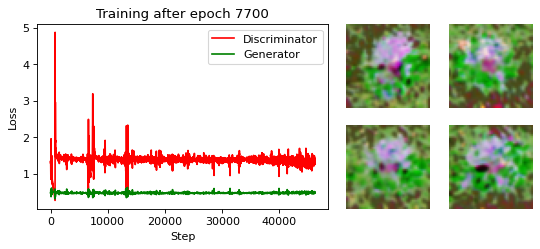

Summary after epoch 7800
Training progress: 78%
Time elapsed: 5117 seconds
Current Discriminator Loss: 1.283
Current Generator Loss: 0.476
Total trained on images: 5990400
Total weight adjustments: 46800


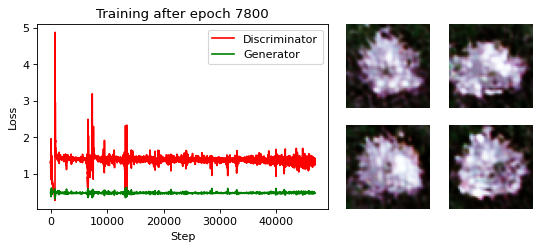

Summary after epoch 7900
Training progress: 79%
Time elapsed: 5183 seconds
Current Discriminator Loss: 1.419
Current Generator Loss: 0.471
Total trained on images: 6067200
Total weight adjustments: 47400


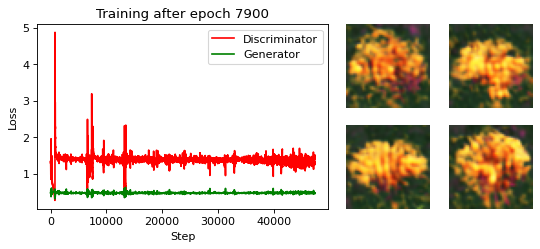

Summary after epoch 8000
Training progress: 80%
Time elapsed: 5248 seconds
Current Discriminator Loss: 1.524
Current Generator Loss: 0.447
Total trained on images: 6144000
Total weight adjustments: 48000


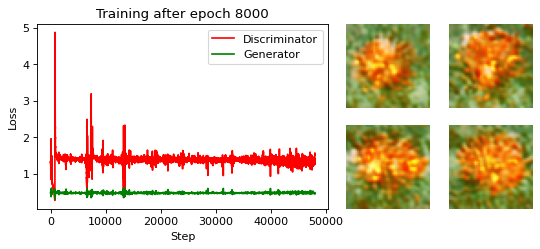

Summary after epoch 8100
Training progress: 81%
Time elapsed: 5314 seconds
Current Discriminator Loss: 1.378
Current Generator Loss: 0.475
Total trained on images: 6220800
Total weight adjustments: 48600


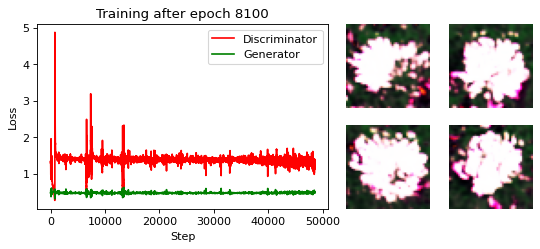

Summary after epoch 8200
Training progress: 82%
Time elapsed: 5380 seconds
Current Discriminator Loss: 1.241
Current Generator Loss: 0.506
Total trained on images: 6297600
Total weight adjustments: 49200


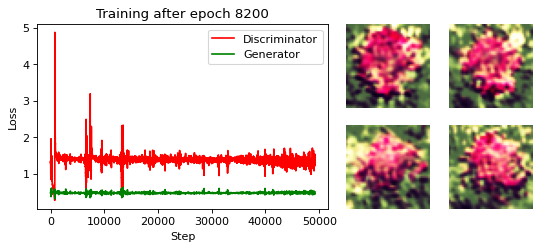

Summary after epoch 8300
Training progress: 83%
Time elapsed: 5445 seconds
Current Discriminator Loss: 1.357
Current Generator Loss: 0.470
Total trained on images: 6374400
Total weight adjustments: 49800


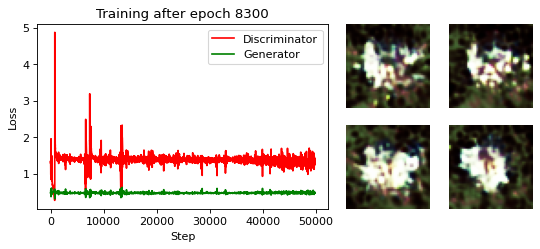

Summary after epoch 8400
Training progress: 84%
Time elapsed: 5511 seconds
Current Discriminator Loss: 1.504
Current Generator Loss: 0.439
Total trained on images: 6451200
Total weight adjustments: 50400


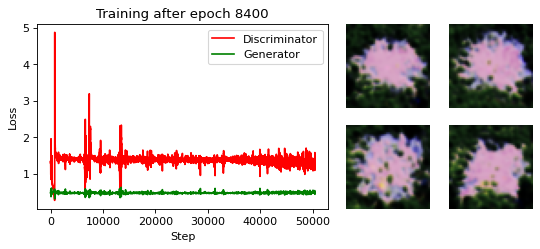

Summary after epoch 8500
Training progress: 85%
Time elapsed: 5576 seconds
Current Discriminator Loss: 1.339
Current Generator Loss: 0.480
Total trained on images: 6528000
Total weight adjustments: 51000


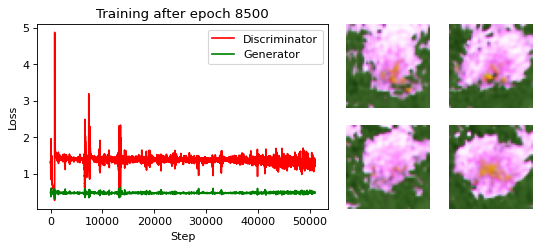

Summary after epoch 8600
Training progress: 86%
Time elapsed: 5642 seconds
Current Discriminator Loss: 1.054
Current Generator Loss: 0.542
Total trained on images: 6604800
Total weight adjustments: 51600


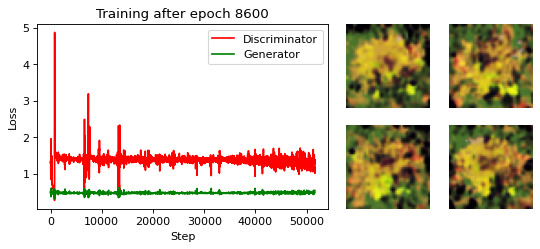

Summary after epoch 8700
Training progress: 87%
Time elapsed: 5708 seconds
Current Discriminator Loss: 1.406
Current Generator Loss: 0.463
Total trained on images: 6681600
Total weight adjustments: 52200


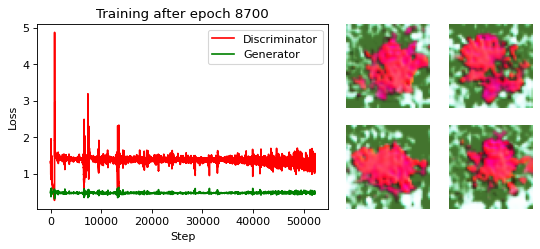

Summary after epoch 8800
Training progress: 88%
Time elapsed: 5773 seconds
Current Discriminator Loss: 1.185
Current Generator Loss: 0.494
Total trained on images: 6758400
Total weight adjustments: 52800


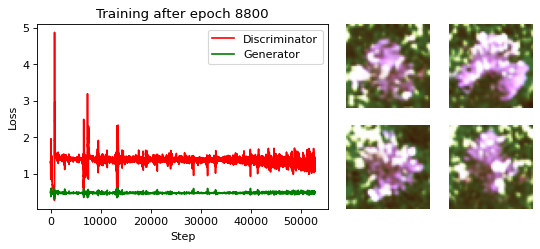

Summary after epoch 8900
Training progress: 89%
Time elapsed: 5839 seconds
Current Discriminator Loss: 1.368
Current Generator Loss: 0.471
Total trained on images: 6835200
Total weight adjustments: 53400


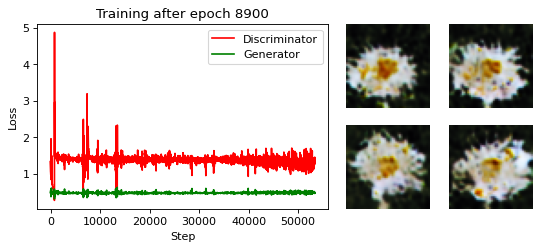

Summary after epoch 9000
Training progress: 90%
Time elapsed: 5905 seconds
Current Discriminator Loss: 1.286
Current Generator Loss: 0.468
Total trained on images: 6912000
Total weight adjustments: 54000


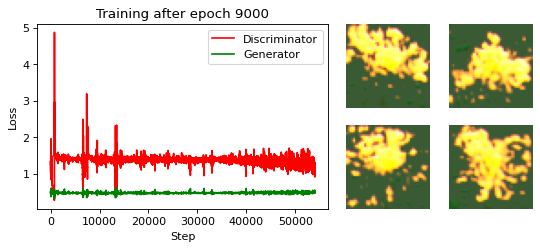

Summary after epoch 9100
Training progress: 91%
Time elapsed: 5971 seconds
Current Discriminator Loss: 1.300
Current Generator Loss: 0.473
Total trained on images: 6988800
Total weight adjustments: 54600


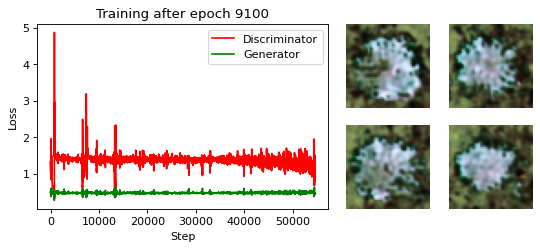

Summary after epoch 9200
Training progress: 92%
Time elapsed: 6036 seconds
Current Discriminator Loss: 1.265
Current Generator Loss: 0.483
Total trained on images: 7065600
Total weight adjustments: 55200


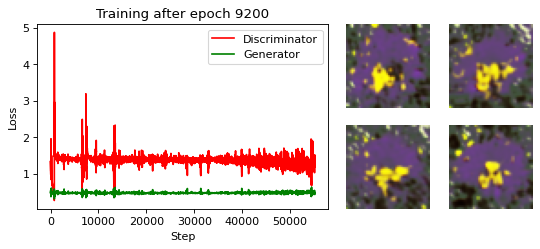

Summary after epoch 9300
Training progress: 93%
Time elapsed: 6102 seconds
Current Discriminator Loss: 1.223
Current Generator Loss: 0.493
Total trained on images: 7142400
Total weight adjustments: 55800


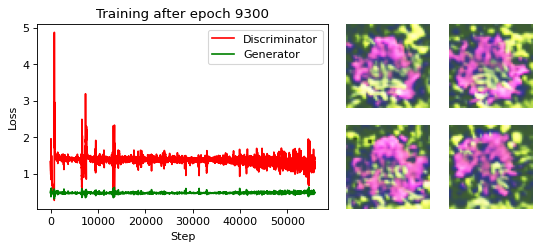

Summary after epoch 9400
Training progress: 94%
Time elapsed: 6168 seconds
Current Discriminator Loss: 1.063
Current Generator Loss: 0.506
Total trained on images: 7219200
Total weight adjustments: 56400


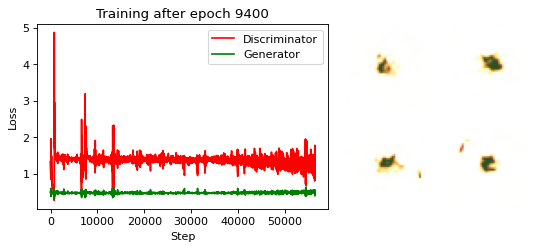

Summary after epoch 9500
Training progress: 95%
Time elapsed: 6233 seconds
Current Discriminator Loss: 1.123
Current Generator Loss: 0.489
Total trained on images: 7296000
Total weight adjustments: 57000


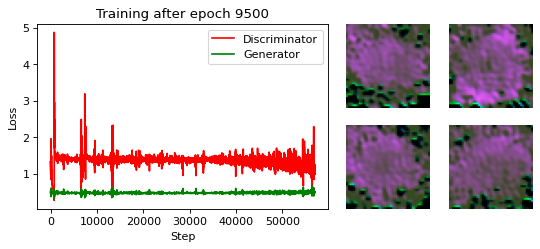

Summary after epoch 9600
Training progress: 96%
Time elapsed: 6299 seconds
Current Discriminator Loss: 1.190
Current Generator Loss: 0.517
Total trained on images: 7372800
Total weight adjustments: 57600


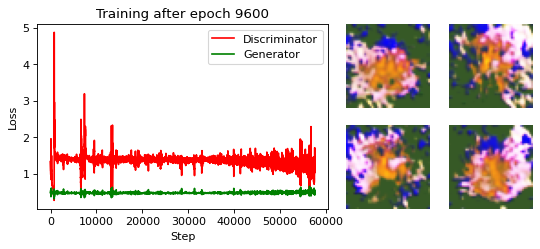

Summary after epoch 9700
Training progress: 97%
Time elapsed: 6364 seconds
Current Discriminator Loss: 1.255
Current Generator Loss: 0.491
Total trained on images: 7449600
Total weight adjustments: 58200


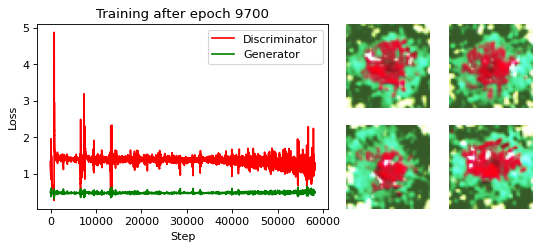

Summary after epoch 9800
Training progress: 98%
Time elapsed: 6430 seconds
Current Discriminator Loss: 1.179
Current Generator Loss: 0.504
Total trained on images: 7526400
Total weight adjustments: 58800


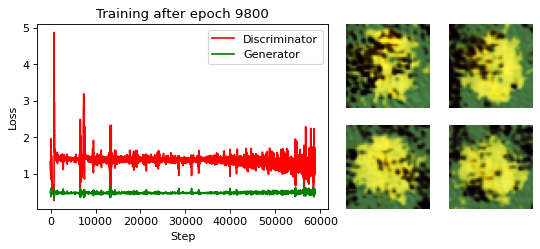

Summary after epoch 9900
Training progress: 99%
Time elapsed: 6496 seconds
Current Discriminator Loss: 1.229
Current Generator Loss: 0.479
Total trained on images: 7603200
Total weight adjustments: 59400


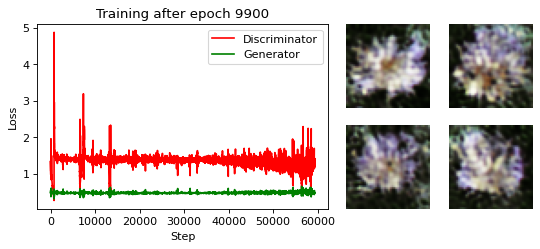

Summary after epoch 10000
Training progress: 100%
Time elapsed: 6562 seconds
Current Discriminator Loss: 1.223
Current Generator Loss: 0.484
Total trained on images: 7680000
Total weight adjustments: 60000


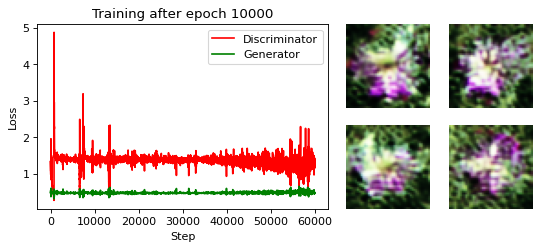

>> Finished Training after 6562 seconds


In [19]:
generator_model = complete_training(generator_learn_rate=0.001, 
                                    discriminator_learn_rate=0.000005, 
                                    batch_size=128, 
                                    pretraining_steps=20, 
                                    training_epochs=10000)

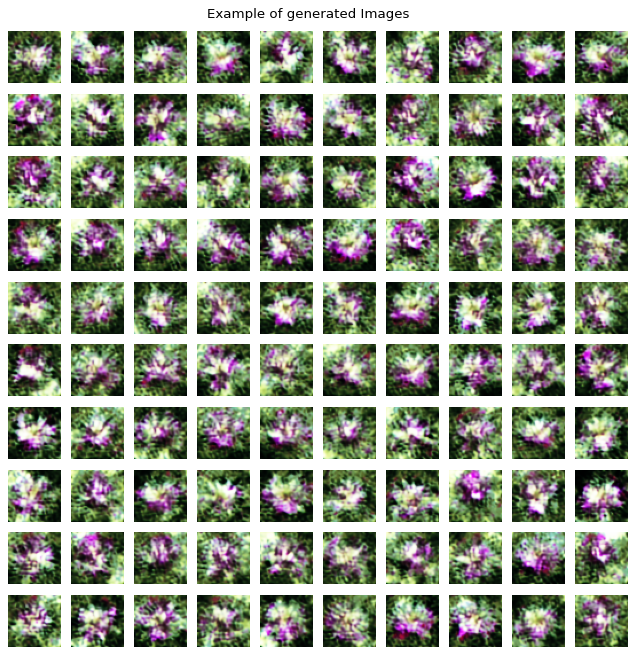

In [20]:
noise = tf.random.normal([100, 100])
fake_img_batch = generator_model(noise, training=False)

fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 10), dpi=80)
plt.suptitle("Example of generated Images", y=0.91)
for i in range(10):
    for j in range(10):
        axes[i][j].imshow(fake_img_batch[i*10+j], cmap="gray")
        axes[i][j].axis('off')

plt.show()